> Importing libraries

In [67]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=e9e813208c83ff5b583f977c2880d4940eded5bdc7b34e8ab53adbb0d12bf024
  Stored in directory: /tmp/pip-ephem-wheel-cache-uzchxes_/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [68]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split


In [69]:
# Importing the time series dataset to be used in the research
student_mat = pd.read_csv("/content/student-mat.csv")
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [70]:
student_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


## Data Checking

In [71]:
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [72]:
student_mat.shape

(395, 33)

In [73]:
student_mat.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [74]:
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Exploring Data

In [75]:
# checking for unique 
student_mat['famsize'].nunique()

2

In [76]:
student_mat.mean()

age           16.696203
Medu           2.749367
Fedu           2.521519
traveltime     1.448101
studytime      2.035443
failures       0.334177
famrel         3.944304
freetime       3.235443
goout          3.108861
Dalc           1.481013
Walc           2.291139
health         3.554430
absences       5.708861
G1            10.908861
G2            10.713924
G3            10.415190
dtype: float64

In [77]:
student_mat.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [78]:
# checking for duplicates
student_mat.duplicated().sum()

0

In [79]:
# checking for null values
student_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [80]:
# describing the data
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [81]:
print(student_mat['age'].quantile(0.25))
print(student_mat['age'].quantile(0.75))

16.0
18.0


In [82]:
student_mat.mode()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,GT3,T,4,2,other,other,course,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,0,10,9,10


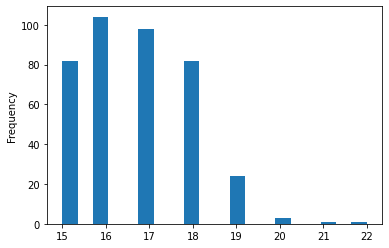

In [83]:
student_mat['age'].plot.hist(bins=20)

In [84]:
print(student_mat['higher'].value_counts())
print(student_mat['sex'].value_counts())

yes    375
no      20
Name: higher, dtype: int64
F    208
M    187
Name: sex, dtype: int64


In [85]:
train = student_mat[:300]
test = student_mat.drop(train.index)
print('Train:' + str(len(train)))
print('Test:' + str(len(test)))

Train:300
Test:95


In [86]:
train_count = train.school.value_counts()
test_count = test.school.value_counts()

print(train_count)
print('**************')
print(test_count)

GP    300
Name: school, dtype: int64
**************
GP    49
MS    46
Name: school, dtype: int64


In [87]:
train_data, test_data = train_test_split(student_mat, test_size=0.3, stratify = student_mat['school'])

print(train_data)
print(test_data)

train_strat_count = train_data['school'].value_counts()
test_strat_count = test_data['school'].value_counts()

print(train_strat_count)
print(test_strat_count)

    school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
143     GP   F   16       U     LE3       T  ...     3       1        2  14  14  13
22      GP   M   16       U     LE3       T  ...     3       5        2  15  15  16
314     GP   F   19       U     GT3       T  ...     1       3       14  15  13  13
336     GP   F   19       R     GT3       A  ...     2       5       12  14  13  13
355     MS   F   18       U     GT3       T  ...     1       5        0  10   9   9
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
288     GP   M   18       U     GT3       T  ...     3       2        6  15  14  14
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
254     GP   M   17       R     GT3       T  ...     4       5        0   8  12  12
15      GP   F   16       U     GT3       T  ...     2       2        4  14  14  14
309     GP   F   19       U     LE3       T  ...     3       3       18  12 

## Selecting, Filtering and Sorting

In [88]:
# selecting a column

student_mat['age'].head()

0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64

In [89]:
student_mat[['absences', 'age', 'sex', 'Medu', 'Fedu']].head()

,absences,age,sex,Medu,Fedu
0,6,18,F,4,4
1,4,17,F,1,1
2,10,15,F,1,1
3,2,15,F,4,2
4,4,16,F,3,3


In [90]:
# selecting rows
student_mat[2:10][['school', 'famsize', 'Mjob', 'guardian']]

,school,famsize,Mjob,guardian
2,GP,LE3,at_home,mother
3,GP,GT3,health,mother
4,GP,GT3,other,father
5,GP,LE3,services,mother
6,GP,LE3,other,mother
7,GP,GT3,other,mother
8,GP,LE3,services,mother
9,GP,GT3,other,mother


In [91]:
# using loc
student_mat.loc[0,'age']

18

In [92]:
student_mat.loc[0:2, ['age', 'sex']]

,age,sex
0,18,F
1,17,F
2,15,F


In [93]:
# using the iloc function
student_mat.iloc[[2,6], 15:]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
6,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11


In [94]:
student_mat.iloc[5:9]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19


In [95]:
student_mat[student_mat['age'] > 19]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7


In [96]:
student_mat[student_mat['Dalc'] > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,5,5,5,5,16,10,12,11
61,GP,F,16,U,GT3,T,1,1,services,services,course,father,4,1,0,yes,yes,no,yes,no,yes,yes,yes,5,5,5,5,5,5,6,10,8,11
66,GP,M,15,U,GT3,A,4,4,other,services,reputation,mother,1,4,0,no,yes,no,yes,no,yes,yes,yes,1,3,3,5,5,3,4,13,13,12
100,GP,M,16,U,GT3,T,4,4,services,services,other,mother,1,1,0,yes,yes,yes,yes,yes,yes,yes,no,4,5,5,5,5,4,14,7,7,5
223,GP,M,18,U,GT3,T,2,2,other,other,home,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,5,5,4,0,12,13,13
236,GP,M,17,U,LE3,T,2,2,other,other,home,father,1,2,0,no,no,yes,yes,no,yes,yes,yes,4,4,2,5,5,4,4,14,13,13
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
327,GP,M,17,R,GT3,T,2,2,services,other,course,mother,4,1,0,no,yes,no,no,yes,yes,yes,no,4,4,5,5,5,4,8,11,10,10
349,MS,M,18,R,GT3,T,3,2,other,other,course,mother,2,1,1,no,yes,no,no,no,yes,yes,no,2,5,5,5,5,5,10,11,13,13


In [97]:
student_mat[student_mat['G2'] > student_mat['G3']].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,0,13,13,12
24,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
26,GP,M,15,U,GT3,T,2,2,other,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,2,5,2,12,12,11


In [98]:
# sorting
student_mat.sort_values(by = ['G1', 'G2', 'G3']).tail()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,1,1,4,6,18,19,19
113,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19
42,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
374,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20


In [99]:
# checking the head of the data
student_mat.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6


In [100]:
# checking the column names to lower case
student_mat.columns = student_mat.columns.str.lower()
student_mat.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [101]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
student_mat['school']= label_encoder.fit_transform(student_mat['school']) 
student_mat['sex']= label_encoder.fit_transform(student_mat['sex']) 
student_mat['address']= label_encoder.fit_transform(student_mat['address']) 
student_mat['famsize']= label_encoder.fit_transform(student_mat['famsize']) 
student_mat['pstatus']= label_encoder.fit_transform(student_mat['pstatus']) 
student_mat['mjob']= label_encoder.fit_transform(student_mat['mjob'])
student_mat['fjob']= label_encoder.fit_transform(student_mat['fjob']) 
student_mat['reason']= label_encoder.fit_transform(student_mat['reason'])  
student_mat['guardian']= label_encoder.fit_transform(student_mat['guardian']) 
student_mat['schoolsup']= label_encoder.fit_transform(student_mat['schoolsup']) 
student_mat['famsup']= label_encoder.fit_transform(student_mat['famsup']) 
student_mat['paid']= label_encoder.fit_transform(student_mat['paid'])
student_mat['activities']= label_encoder.fit_transform(student_mat['activities'])
student_mat['nursery']= label_encoder.fit_transform(student_mat['nursery'])  
student_mat['internet']= label_encoder.fit_transform(student_mat['internet']) 
student_mat['higher']= label_encoder.fit_transform(student_mat['higher'])
student_mat['romantic']= label_encoder.fit_transform(student_mat['romantic'])
student_mat['school']= label_encoder.fit_transform(student_mat['school'])    

In [102]:
student_mat.rename({'traveltime':'travel_time', 'studytime':'study_time'}, axis=1, inplace=True)
student_mat.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,travel_time,study_time,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [103]:
# using the groupby function

df = student_mat.groupby(['sex'])['g1', 'g2', 'g3']
df.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,g1,g2,g3
sex,,,
0,2209,2161,2073
1,2100,2071,2041


In [104]:
df1 = student_mat.groupby('sex')['dalc', 'walc']
df1.count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dalc,walc
sex,,
0,208,208
1,187,187


In [105]:
dat = student_mat.groupby(['school', 'sex'])['famrel', 'freetime',	'goout']
dat.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



famrel  freetime     goout
school sex                              
0      0    3.901639  3.010929  3.049180
       1    4.024096  3.457831  3.180723
1      0    3.840000  3.000000  2.880000
       1    3.809524  3.714286  3.333333

## Data Analysis

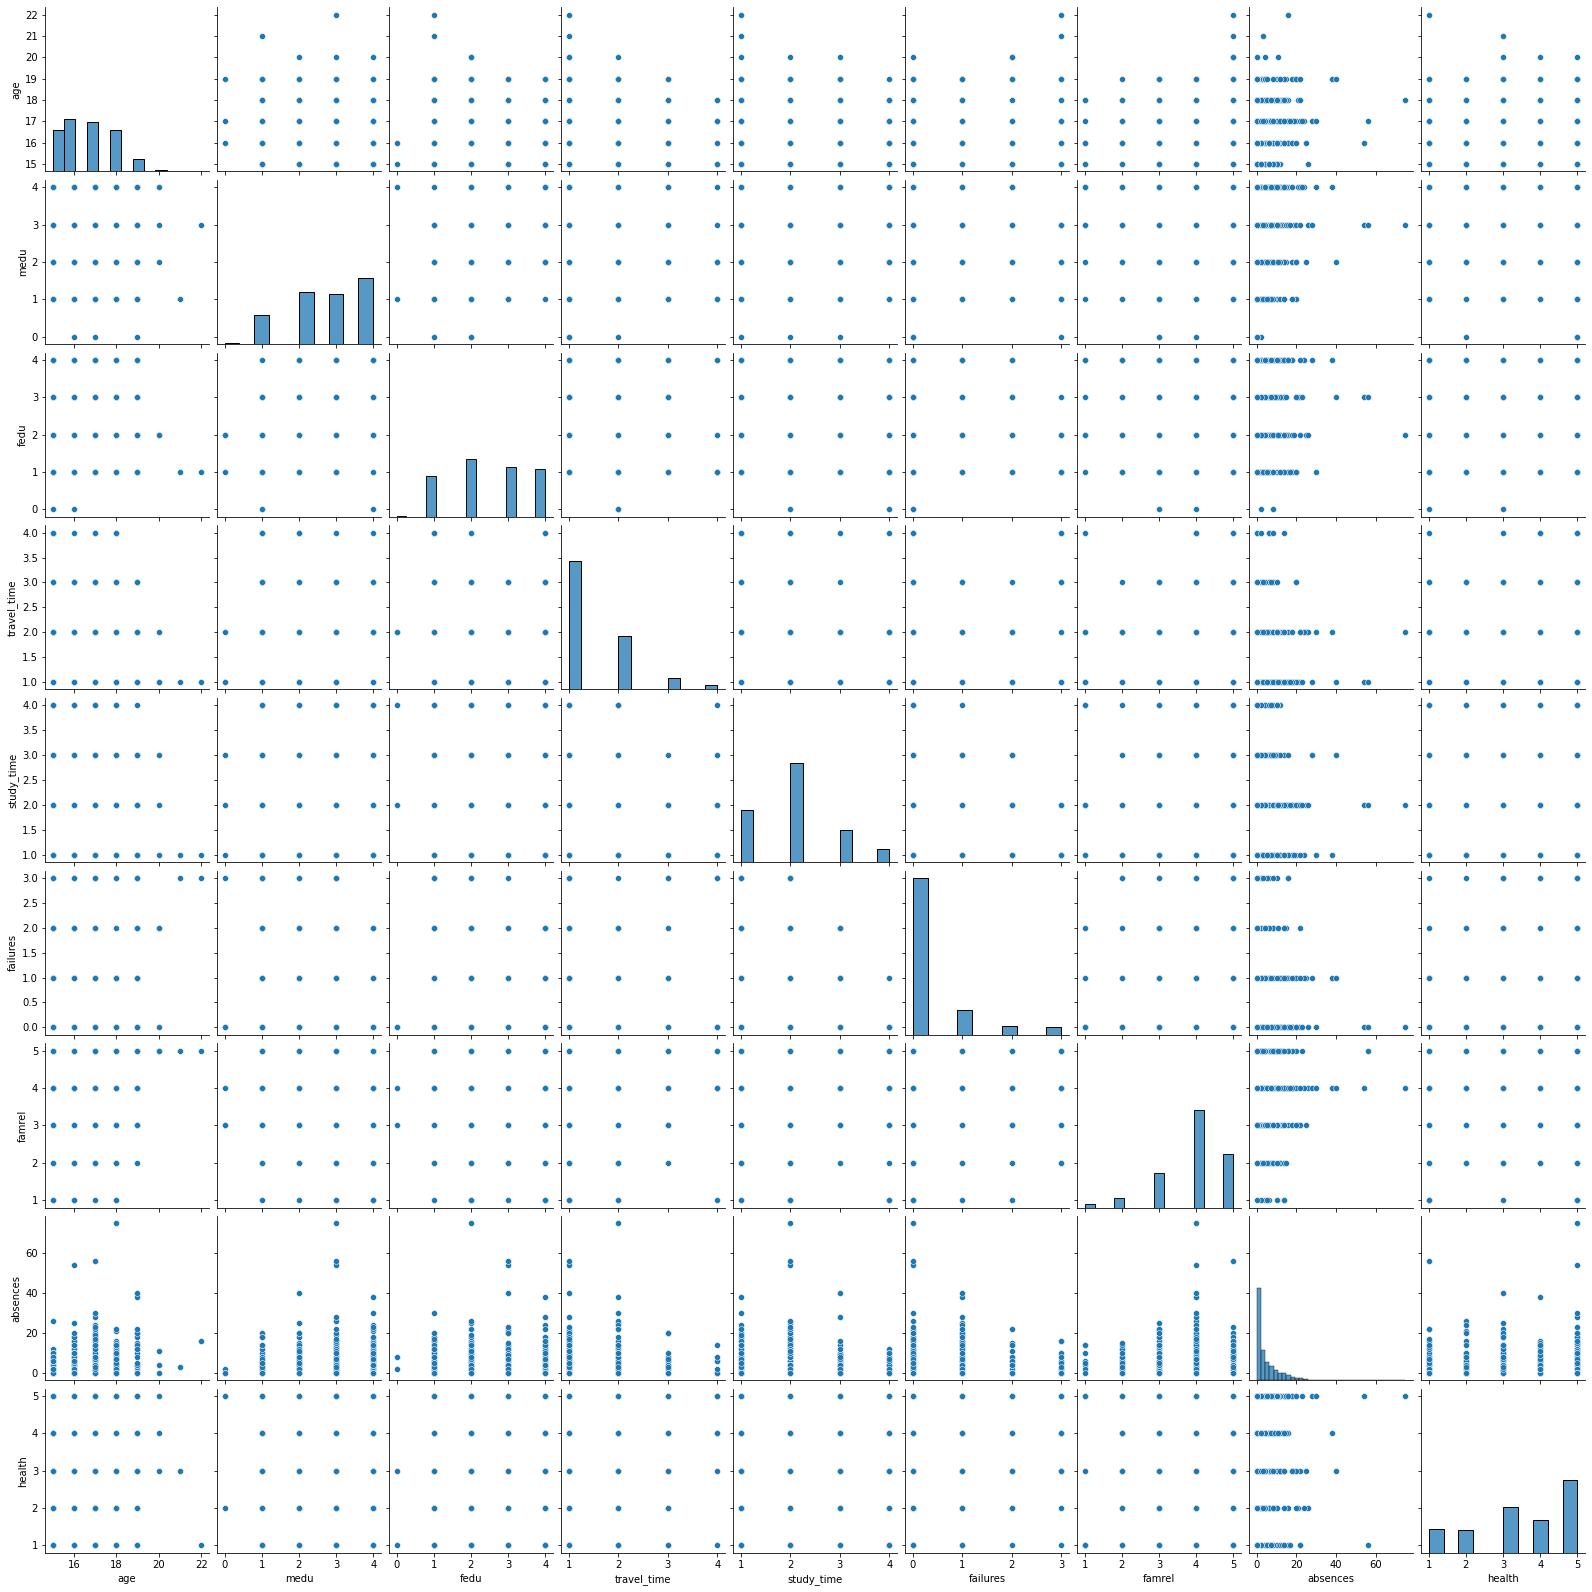

In [106]:
import seaborn as sns
# make pairplots
sns.pairplot(student_mat, vars = ["age", "medu", "fedu", "travel_time", "study_time", "failures", "famrel", "absences", "health"], dropna = True)


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



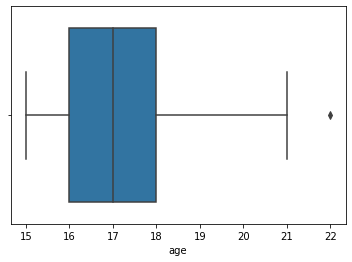

In [107]:
# checking for outliers

print(sns.boxplot(student_mat['age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AxesSubplot(0.125,0.125;0.775x0.755)


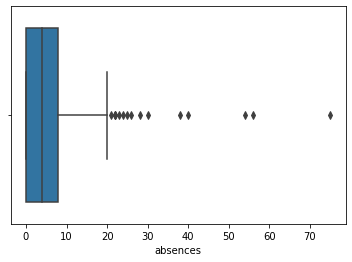

In [108]:
# checking for outliers
print(sns.boxplot(student_mat['absences']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

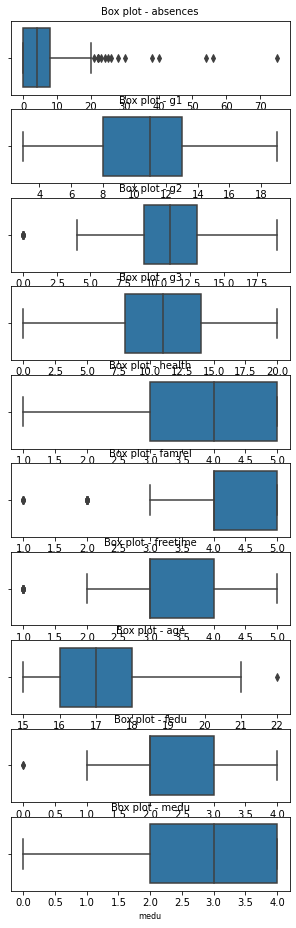

In [109]:
# Checking for Anomalies
# 
# Checking for outliers in the columns with numerical data
col_names = ['absences','g1', 'g2', 'g3', 'health', 'famrel', 'freetime', 'age', 'fedu', 'medu']

fig, ax = plt.subplots(len(col_names), figsize=(5,16))

for i, col_val in enumerate(col_names):
    sns.boxplot(student_mat[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [110]:
# checking for anomalities
Q1 = student_mat.quantile(0.25)

Q3 = student_mat.quantile(0.75)

IQR = Q3 - Q1
IQR

school         0.0
sex            1.0
age            2.0
address        0.0
famsize        1.0
pstatus        0.0
medu           2.0
fedu           1.0
mjob           1.0
fjob           1.0
reason         3.0
guardian       0.0
travel_time    1.0
study_time     1.0
failures       0.0
schoolsup      0.0
famsup         1.0
paid           1.0
activities     1.0
nursery        0.0
higher         0.0
internet       0.0
romantic       1.0
famrel         1.0
freetime       1.0
goout          2.0
dalc           1.0
walc           2.0
health         2.0
absences       8.0
g1             5.0
g2             4.0
g3             6.0
dtype: float64

In [111]:
# Removing the outliers

student_mat1 = student_mat[~((student_mat < (Q1 - 1.5 * IQR)) |(student_mat > (Q3 + 1.5 * IQR))).any(axis=1)]
student_mat1.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,travel_time,study_time,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
9,0,1,15,1,0,1,3,4,2,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15
10,0,0,15,1,0,1,4,4,4,1,3,1,1,2,0,0,1,1,0,1,1,1,0,3,3,3,1,2,2,0,10,8,9


In [112]:
student_mat1.shape

(69, 33)

In [113]:
student_mat.shape

(395, 33)

# Exploratory Data Analysis

### Univeriate Analysis

In [114]:
student_mat.head(1)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,travel_time,study_time,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6


Text(0.5, 1.0, 'School alcohol Consumption')

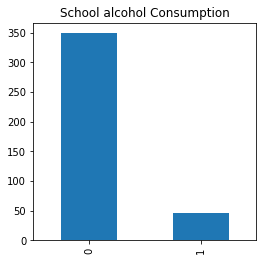

In [115]:
plt.figure(figsize=(4,4))
student_mat.school.value_counts().plot.bar()
plt.title('School alcohol Consumption')

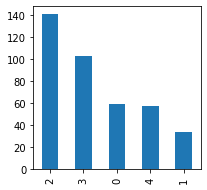

In [116]:
plt.figure(figsize = (3,3))
student_mat.mjob.value_counts().plot.bar()

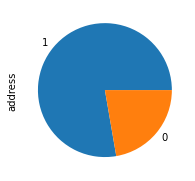

In [117]:
plt.figure(figsize = (3,4))
student_mat.address.value_counts().plot(kind = 'pie')

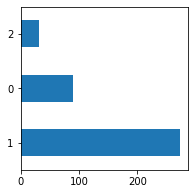

In [118]:
plt.figure(figsize = (3,3))
student_mat.guardian.value_counts().plot(kind = 'barh')

## Bivariate Data Analysis

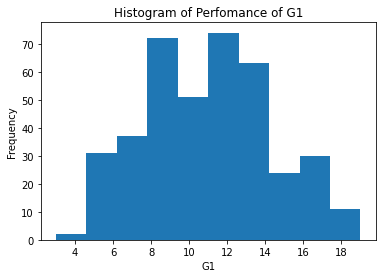

In [119]:
# ploting the histogram on g1.
student_mat.g1.plot.hist()
plt.title('Histogram of Perfomance of G1')
plt.ylabel('Frequency')
plt.xlabel('G1')
plt.show()

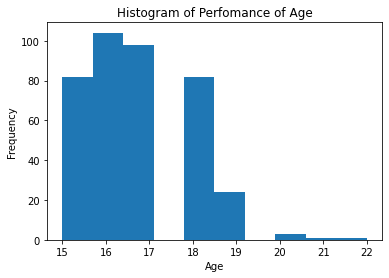

In [120]:
# ploting the histogram on age
student_mat.age.plot.hist()
plt.title('Histogram of Perfomance of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

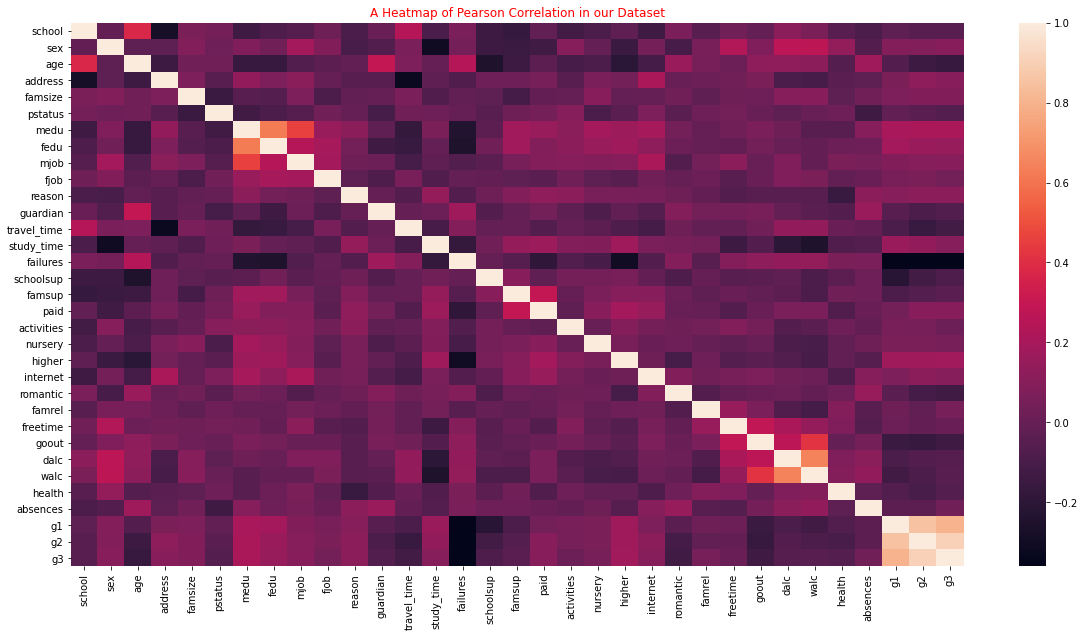

In [121]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(student_mat.corr(),annot=False)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

In [122]:
# finding the skewness of the data

student_mat.skew()

school         2.400519
sex            0.106886
age            0.466270
address       -1.337481
famsize        0.936623
pstatus       -2.607984
medu          -0.318381
fedu          -0.031672
mjob          -0.335188
fjob          -0.362303
reason         0.409568
guardian      -0.111546
travel_time    1.607029
study_time     0.632142
failures       2.387026
schoolsup      2.220534
famsup        -0.464291
paid           0.168315
activities    -0.035584
nursery       -1.466570
higher        -4.114829
internet      -1.791595
romantic       0.705766
famrel        -0.951882
freetime      -0.163351
goout          0.116502
dalc           2.190762
walc           0.611960
health        -0.494604
absences       3.671579
g1             0.240613
g2            -0.431645
g3            -0.732672
dtype: float64

In [123]:
# finding the kurtosis

student_mat.kurt()

school          3.781612
sex            -1.998721
age            -0.001222
address        -0.212244
famsize        -1.128476
pstatus         4.825989
medu           -1.090014
fedu           -1.198539
mjob           -0.671911
fjob            1.027999
reason         -1.397718
guardian        0.181663
travel_time     2.344190
study_time     -0.014432
failures        5.004727
schoolsup       2.945660
famsup         -1.793540
paid           -1.981730
activities     -2.008931
nursery         0.151568
higher         15.007785
internet        1.215945
romantic       -1.509564
famrel          1.139772
freetime       -0.301807
goout          -0.770250
dalc            4.759492
walc           -0.790845
health         -1.014078
absences       21.719150
g1             -0.693830
g2              0.627706
g3              0.403421
dtype: float64

In [124]:
# finding the standerd deviation

student_mat.std()

school         0.321177
sex            0.499926
age            1.276043
address        0.416643
famsize        0.453690
pstatus        0.305384
medu           1.094735
fedu           1.088201
mjob           1.227473
fjob           0.863542
reason         1.208236
guardian       0.536684
travel_time    0.697505
study_time     0.839240
failures       0.743651
schoolsup      0.335751
famsup         0.487761
paid           0.498884
activities     0.500555
nursery        0.404260
higher         0.219525
internet       0.373528
romantic       0.472300
famrel         0.896659
freetime       0.998862
goout          1.113278
dalc           0.890741
walc           1.287897
health         1.390303
absences       8.003096
g1             3.319195
g2             3.761505
g3             4.581443
dtype: float64

In [125]:
student_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

## Multivariate Data Analysis

In [126]:
# Diving the dataset to train and test
X = student_mat[['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3']].values
y = student_mat['health'].values

In [127]:
# The following code divides data into test sets by using 20% of the data
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
# perfoming the LDA
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [130]:
#vTraining and Making Predictions
# We use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [131]:
# Step 8: Evaluating the Performance
# we find a confusion matrix and the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 0  0  9  0  0]
 [ 0  0 12  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 28]]
Accuracy0.7341772151898734
